### Tiffany Kashima
- Computational Mathematics - Numeric Integration
- Module G (part 2)

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate

#### Numeric Integration - Trapezoidal Rule (TR)

A closer look at Trapezoidal Rule: 
- There are several methods that have been developed to numerically estimate integrals.  A common method is the trapezoidal rule, which uses a discrete number of trapezoids fitted under the sufficiently smooth, continuous function over a fixed interval, [$a,b$].  The height of each trapezoid is defined by the given function ($f_0$ and $f_1$) and the grid (or 1D stencil) of x points that define the widths of each trapezoid is the distance between $x_0$ and $x_i$ ($h$).  
- Summing all the trapezoids over the interval [$a,b$] gives the numeric approximation of the area under the deinite integral of $f$.
- Geometrically, a trapezoid is the sum of a rectangle and traiangle, given by $(x_1 - x_0)(f_0) + 1/2(f_1 - f_0)(x_1 - x_0)$


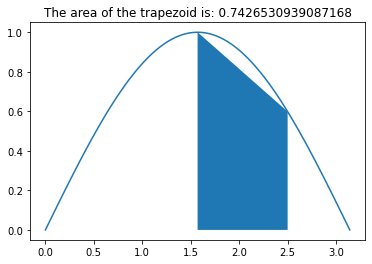

In [30]:
# extending upon our example from Numerical Integration part 1 notebook

# plot the function f(x) = sin(x)
x = np.linspace(0,np.pi,100)
y = np.sin(x)
plt.plot(x,y)

# define our interval as [pi/2, pi] and graph the trapezoid under this interval with one trapezoid
x0 = np.pi/2 
x1 = 2.5
y0 = np.sin(x0)
y1 = np.sin(x1)
plt.fill_between([x0,x1],[y0,y1])

area = .5*(x1-x0)*(y1-y0) + y0*(x1-x0)
plt.title('The area of the trapezoid is: {}'.format(area))
plt.show()


In [24]:
def function(x):
    return np.sin(x)

intArea = scipy.integrate.quad(function,np.pi/2,2.5)
print('The exact area is: {}'.format(intArea[0]))
print('The error between one trapezoid and the exact integral is: {}'.format(abs(intArea[0]-area)))

The exact area is: 0.8011436155469337
The error between one trapezoid and the exact integral is: 0.058490521638216886


Deriving the trapezoidal rule:

$T_{A_2} = \frac{\Delta x}{2} \sum_{i=1}^n (f(x_i) + f(x_{i-1}))$

Define:
$f(x)=f(x_0+\Delta x)$
where $\Delta x = x - x_0$

Taylor expansion:
$f(x_0 + \Delta x)=f(x_0+\Delta x) = f(x_0) + \Delta x f'(x_0) + \frac {\Delta x^2}{2!} f"(x_0)+ ...$

$ \int_{x_0}^x f(x)dx = (x-x_0)f_0 + \frac{(x-x_0)^2}{2!}f'_0 + \frac{(x-x_0)^3}{3!}f''_0 + \frac{(x-x_0)^4}{4!}f'''_0 + \frac{(x-x_0) ^5}{5!}f^{(4)}_0 + ...$

$T_{A_2} = \frac{\Delta x}{2} (f(x_0) + f(x_0) + \Delta x f'(x_0) + \frac {\Delta x^2}{2!} f"(x_0)+ ...)$

$= \Delta xf(x_0) + \frac {\Delta x^2}{2}f'(x_0) + \frac {\Delta x^3}{4}f"(x_0)+ ...$

local error, $e_l = Exact - Approx$

$e_l = \frac {-\Delta x^3}{12} f'''(x_0)$


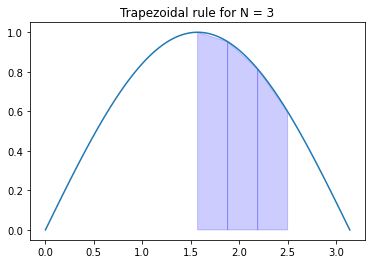

In [35]:
N = 3

# defining interval for n trapezoids and function, f
interval = np.linspace(np.pi/2,2.5,N+1)
f = lambda x: np.sin(x)

# grid for x values
X = np.linspace(0,np.pi,100)
plt.plot(x,y)

for i in range(N):
    xs = [interval[i],interval[i],interval[i+1],interval[i+1]]
    ys = [0,f(interval[i]),f(interval[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoidal rule for N = {}'.format(N))
plt.show()

In [36]:
# using the class created from the previous numerical integration notebook to calculate TR for N=3

class Integrate:
    def __init__(self,f,a,b):
        if not a<b:
            raise ValueError('a must be less than b')
        else:
            self.f = f
            self.a = a
            self.b = b

    def useMidpoint(self,n):
        if (not type(n) is int) | (n <=0):
            raise TypeError('only integer values greater than 0 are allowed')
        else:
            xpts = np.linspace(self.a,self.b,n)
            h = (self.b-self.a)/(n-1)
            mid = h * sum(self.f((xpts[:n-1]+xpts[1:])/2))
        return mid
    
    def useTR(self,n):
        if (not type(n) is int) | (n <=0):
            raise TypeError('only integer values greater than 0 are allowed')
        else:
            xpts = np.linspace(self.a,self.b,n)
            h = (self.b-self.a)/(n-1)
            tr = (h/2) * sum(self.f(xpts[:n-1])+self.f(xpts[1:]))
        return tr
    
    def useSimp(self,n):
        if (not type(n) is int) | (n <=0):
            raise TypeError('only even integer values greater than 0 are allowed')
        else:
            xpts = np.linspace(self.a,self.b,n)
            h = (self.b-self.a)/(n-1)
            simp = (h/3) * sum(self.f(xpts[:n-2:2])+4*self.f(xpts[1:n-1:2])+self.f(xpts[2:n:2]))
        return simp


In [37]:
integral = Integrate(function,np.pi/2,2.5)

In [38]:
N3area = integral.useTR(3)
N3area

0.7866806075993443

In [42]:
print('The error for 3 trapezoids using the Trapezoidal rule is: {}'.format(abs(intArea[0] - N3area)))

The error for 3 trapezoids using the Trapezoidal rule is: 0.014463007947589368
